# CSCI 5897 Homework 1
### Anya Lee

### **Problem 1**
Following the SIR in-class demo notebook (in Class\_Notes) which simulates the SIR model in the absence of population growth, I was able to write a function in Python that uses Forward Euler method to simulate the SIR model *in which the population is slowly growing*. 

In your simulations, suppose that we have an initial population of size $N=1000$, with $I_0=1$, $S_0=999$. Suppose that $\beta=1$, $\gamma=0.5$, and then $\mu_{\text{birth}}=0.01$ and $\mu_{\text{death}} = \tfrac{1}{2} \mu_\text{birth}$. 

Produce a single plot that captures the dynamics of transmission over the appropriate amount of time for the population to grow by 50\% to a total of $N=1500$. Be sure to include a legend and your name in the title of the plot.

When the population is slowly growing, we have the following system of ordinary differential equations now that we are accounting for birth and death, where birth rate $\mu_{birth} > \mu_{death}$. As learned in class, we have the following system.
$$
\dot{S} = \frac{-\beta SI}{N} + \mu_{birth} N - \mu_{death} S \\
\dot{I} = \frac{\beta SI}{N} - \gamma I - \mu_{death} I \\
\dot{R} = \gamma I - \mu_{death} R
$$

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def SIR_growth(S0, I0, R0, beta, gamma, mu_birth, mu_death, t_max, stepsize):
    T = np.arange(0, t_max + stepsize, stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    
    for idx, t in enumerate(T):
        if idx == 0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
        else:
            N = S[idx-1] + I[idx-1] + R[idx-1]

            dS_dt = -beta * S[idx-1] * I[idx-1] / N + mu_birth*N - mu_death*S[idx-1]
            dI_dt = beta * S[idx-1] * I[idx-1] / N - gamma*I[idx-1] - mu_death*I[idx-1]
            dR_dt = gamma*I[idx-1] - mu_death*R[idx-1]

            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
            R[idx] = R[idx-1] + dR_dt * stepsize

    return S, I, R, T

Text(0.5, 1.0, 'SIR with Population Growth. Anya Lee.')

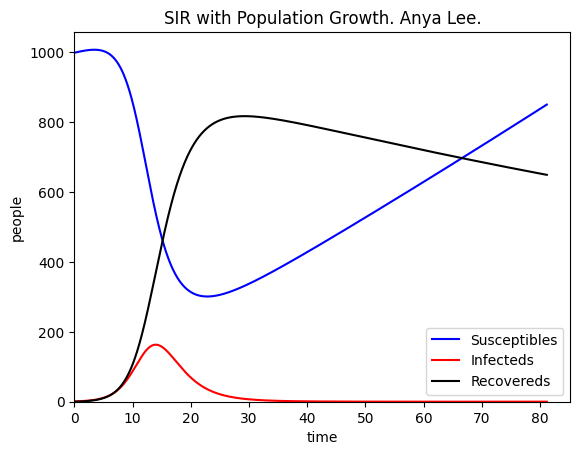

In [24]:
# SIR(S0,I0,R0, beta, gamma, mu_birth, mu_death, t_max, stepsize):
beta = 1
gamma = 0.5
mu_birth = 0.01
mu_death = 0.5*mu_birth
t_max = 81.11

S,I,R,T = SIR_growth(999, 1, 0,
             beta, gamma, mu_birth, mu_death, t_max, 0.05)

fig, ax = plt.subplots()
ax.plot(T,S, color = 'b', label='Susceptibles')
ax.plot(T,I, color = 'r', label='Infecteds')
ax.plot(T,R, color = 'k', label='Recovereds')
ax.set_xlabel('time')
ax.set_ylabel('people')
ax.legend()
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
ax.set_title("SIR with Population Growth. Anya Lee.")

Above, we obtain a plot that captures the dynamics of transmission over the appropriate amount of time for the population to grow by 50% to a total of $N=1500$. Note: I could have used a "while" loop, but chose to find out when the total population reaches $N=1500$ manually. The computation is below.

We know we can model population growth using the exponential growth equation and from previous knowledge we know $r =\mu_{birth} - \mu_{death} > 0 $ where $r$ is the growth rate. So we have the solution:
$$
N(t) = N_0e^{rt}
$$
where $N_0 = S_0 + I_0 + R_0$.

We can solve for $t_{max}$ using this equation since all other values are known.
$$
\begin{align}
1500 &= 1000e^{rt_{max}} \\
1.5 &= e^{rt_{max}} \\
ln(1.5) &= ln(e^{rt_{max}}) \\
ln(1.5) &= rt_{max} \\
t_{max} &= \frac{ln(1.5)}{r}
\end{align}
$$

Now, from the problem statement, we know $\mu_{birth}=0.01 \text{and} \mu_{death}=0.5*\mu_{birth}=0.5*0.01=0.005$. Recall that $r =\mu_{birth} - \mu_{death} = 0.01-0.005 = 0.005$. Now we can solve for $t_{max}$.
$$
\begin{align}
t_{max} &= \frac{ln(1.5)}{r} \\
t_{max} &= \frac{ln(1.5)}{0.005} \\
t_{max} &\approx 81.093
\end{align}
$$

We then use $t_max=81.093$ in the above simulation.

In [25]:
N = S + I + R  # after simulation
print("Final N:", N[-1])

Final N: 1500.3513135240373


### **Problem 2**


### **Problem 3**

### **Problem 4**